In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install transformers sentencepiece datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

We finetune our Russian-English T5 model on several tasks:
* Topic classification (to do)
* Dialog act classification (Switchboard)
* Dialog act classification (MIDAS)
* Emotional classification
* Sentiment classification
* Toxic classification
* Factoid classification

In [ ]:
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)
import torch
from datasets import load_dataset

In [ ]:
from google.colab import drive
drive.mount('/gd')

Mounted at /gd


In [ ]:
import os

In [ ]:
# raw_model = 'cointegrated/rut5-base'  
# MODEL_NAME = '/gd/MyDrive/models/rut5-base-partial'

# if os.path.exists(MODEL_NAME):  # continue fine-tuning
#     raw_model = MODEL_NAME
# model = T5ForConditionalGeneration.from_pretrained(raw_model)
# tokenizer = T5Tokenizer.from_pretrained(raw_model)

### Create the tasks

``` 
def task():
    return input_text, output_text
```

**dialog_act_classification (Switchboard)**

In [145]:
dataset = pd.read_csv("swda_train_to_model.csv", encoding='utf-8')
dataset = dataset[['text', 'code']]
len(dataset.code.unique())

41

In [ ]:
import datasets
from datasets import Dataset
import pandas as pd

df = pd.read_csv("swda_train_to_model.csv")
df = df[['text', 'code']]

train_df = pd.DataFrame({
     "label" : list(df['code']),
     "text" : list(df['text'])
})

df = pd.read_csv("swda_test_to_model.csv")
df = df[['text', 'code']]
test_df = pd.DataFrame({
     "label" : list(df['code']),
     "text" : list(df['text'])
})

df = pd.read_csv("swda_val_to_model.csv")
df = df[['text', 'code']]
val_df = pd.DataFrame({
     "label" : list(df['code']),
     "text" : list(df['text'])
})

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
val_dataset = Dataset.from_dict(val_df)
dialog_acts_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

In [ ]:
dialog_acts_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 192386
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 4078
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 3272
    })
})

In [ ]:
import random

In [ ]:
def dialog_acts_classification_task():
    item = random.choice(dialog_acts_dict['train'])
    return f'dialog acts | {item["text"]}', item["label"]

dialog_acts_classification_task()

('dialog acts | иногда это почти невозможно сделать, потому что, эм, ты знаешь, твое, эм, твое время, твое пространство - это не твое собственное пространство.',
 'sv')

In [ ]:
def dialog_acts_classification_task_VAL():
    item = random.choice(dialog_acts_dict['val'])
    return f'dialog acts | {item["text"]}', item["label"]

dialog_acts_classification_task_VAL()

('dialog acts | Деньги от, деньги на заботу о младенцах отнимают деньги у заботы о пожилых людях,',
 'sv')

**dialog_act_classification (MIDAS)**

In [143]:
dataset = pd.read_csv("MIDAS_train_to_model.csv")
dataset = dataset[['text', 'joint_labels']]
len(dataset.joint_labels.unique())

41

In [ ]:
import datasets
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("MIDAS_train_to_model.csv")
df = df[['text', 'joint_labels']]
train_df = pd.DataFrame({
     "label" : list(df['joint_labels']),
     "text" : list(df['text'])
})

df = pd.read_csv("MIDAS_test_to_model.csv")
# val, test = train_test_split(df, test_size=0.5, random_state=42)
# test = test[['text', 'joint_labels']]
# test_df = pd.DataFrame({
#      "label" : list(test['joint_labels']),
#      "text" : list(test['text'])
# })
df = df[['text', 'joint_labels']]
test_df = pd.DataFrame({
     "label" : list(df['joint_labels']),
     "text" : list(df['text'])
})

df = pd.read_csv("MIDAS_val_to_model.csv")
df = df[['text', 'joint_labels']]
val_df = pd.DataFrame({
     "label" : list(df['joint_labels']),
     "text" : list(df['text'])
})

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
val_dataset = Dataset.from_dict(val_df)
dialog_acts_dict_MIDAS = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

In [ ]:
dialog_acts_dict_MIDAS

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 10287
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1296
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 1296
    })
})

In [ ]:
# df = pd.DataFrame()
# df['text'] = dialog_acts_dict_MIDAS['test']['text']
# df['label'] = dialog_acts_dict_MIDAS['test']['label']
# df.to_csv('test.csv')

In [ ]:
# df = pd.DataFrame()
# df['text'] = dialog_acts_dict_MIDAS['val']['text']
# df['label'] = dialog_acts_dict_MIDAS['val']['label']
# df.to_csv('val.csv')

In [79]:
def dialog_acts_MIDAS_classification_task():
    item = random.choice(dialog_acts_dict_MIDAS['train'])
    return f'dialog acts MIDAS | {item["text"]}', item["label"]

dialog_acts_MIDAS_classification_task()

('dialog acts MIDAS | вы хотите услышать больше подобных историй : ПУСТО > да',
 'pos_answer;command')

In [80]:
def dialog_acts_MIDAS_classification_task_VAL():
    item = random.choice(dialog_acts_dict_MIDAS['val'])
    return f'dialog acts MIDAS | {item["text"]}', item["label"]

dialog_acts_MIDAS_classification_task_VAL()

('dialog acts MIDAS | вы когда-нибудь намеренно вводили первую букву текста в нижний регистр, чтобы выглядеть грустным или разочарованным : ПУСТО > да',
 'pos_answer')

**emotion_classification**

In [ ]:
emotion_classification_dict = load_dataset("cedr")

Generating train split:   0%|          | 0/7528 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1882 [00:00<?, ? examples/s]

Dataset cedr downloaded and prepared to /root/.cache/huggingface/datasets/cedr/main/0.1.1/117570489cbabbdf8de619bd31918a1cd680a7f286b89d04af340d0691dc2d66. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Emotion label codes: {0: "joy", 1: "sadness", 2: "surprise", 3: "fear", 4: "anger"}

In [ ]:
codes = {0: "joy", 1: "sadness", 2: "surprise", 3: "fear", 4: "anger"}

In [ ]:
emotion_classification_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 7528
    })
    test: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 1882
    })
})

In [ ]:
# train, val = train_test_split(emotion_classification_dict['train'], test_size=0.2, random_state=42)

In [ ]:
# len(val["text"])

1506

In [ ]:
import datasets
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# emotion_classification_dict = load_dataset("cedr")

# train, val = train_test_split(emotion_classification_dict['train'], test_size=0.2, random_state=42)
df = pd.read_csv("emotion_train_to_model.csv")
train_df = pd.DataFrame({
     "label" : list(train['label']),
     "text" : list(train['text'])
})

df = pd.read_csv("emotion_test_to_model.csv")
test_df = pd.DataFrame({
     "label" : list(emotion_classification_dict['test']['label']),
     "text" : list(emotion_classification_dict['test']['text'])
})

df = pd.read_csv("emotion_val_to_model.csv")
val_df = pd.DataFrame({
     "label" : list(val['label']),
     "text" : list(val['text'])
})

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
val_dataset = Dataset.from_dict(val_df)
emotion_classification_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
emotion_classification_dict

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 6022
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 1882
    })
    val: Dataset({
        features: ['labels', 'text'],
        num_rows: 1506
    })
})

In [ ]:
# df = pd.DataFrame()
# df['text'] = emotion_classification_dict['train']['text']
# df['label'] = emotion_classification_dict['train']['labels']
# df.to_csv('train.csv')

# df = pd.DataFrame()
# df['text'] = emotion_classification_dict['test']['text']
# df['label'] = emotion_classification_dict['test']['labels']
# df.to_csv('test.csv')

# df = pd.DataFrame()
# df['text'] = emotion_classification_dict['val']['text']
# df['label'] = emotion_classification_dict['val']['labels']
# df.to_csv('val.csv')

In [ ]:
def emotion_classification_task():
    item = random.choice(emotion_classification_dict['train'])
    if len(item["label"]) > 0:
      return f'emotion | {item["text"]}', codes[item["label"][0]]
    else:
      return f'emotion | {item["text"]}', ''

emotion_classification_task()

('emotion | Острова 2014 скорее всего не будет((((( вот это печаль так печаль...',
 'sadness')

In [ ]:
def emotion_classification_task_VAL():
    item = random.choice(emotion_classification_dict['val'])
    if len(item["label"]) > 0:
      return f'emotion | {item["text"]}', codes[item["label"][0]]
    else:
      return f'emotion | {item["text"]}', ''

emotion_classification_task_VAL()

('emotion | Его вещи и имущество злоумышленники не тронули.', '')

**sentiment_classification**

In [141]:
dataset = pd.read_csv("rusentiment_preselected_posts.csv")
dataset.label.unique()

array(['neutral', 'negative', 'skip', 'positive', 'speech'], dtype=object)

In [ ]:
import datasets
from datasets import Dataset
import pandas as pd

# df = pd.read_csv("rusentiment_random_posts.csv")
df = pd.read_csv("sentiment_train.csv")
# train, val = train_test_split(df, test_size=0.1, random_state=42)
train_df = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

# df = pd.read_csv("rusentiment_test.csv")
df = pd.read_csv("sentiment_test.csv")
test_df = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("sentiment_val.csv")
val_df = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

### Для диверсификации  pre-selected with an active learning-style strategy 
# df = pd.read_csv("rusentiment_preselected_posts.csv")
# val_df = pd.DataFrame({
#      "label" : list(df['label']),
#      "text" : list(df['text'])
# })

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
val_dataset = Dataset.from_dict(val_df)
sentiment_classification_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

In [ ]:
sentiment_classification_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 19141
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 2967
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 2127
    })
})

In [ ]:
# df = pd.DataFrame()
# df['text'] = sentiment_classification_dict['train']['text']
# df['label'] = sentiment_classification_dict['train']['label']
# df.to_csv('train.csv')

# df = pd.DataFrame()
# df['text'] = sentiment_classification_dict['test']['text']
# df['label'] = sentiment_classification_dict['test']['label']
# df.to_csv('test.csv')

# df = pd.DataFrame()
# df['text'] = sentiment_classification_dict['val']['text']
# df['label'] = sentiment_classification_dict['val']['label']
# df.to_csv('val.csv')

In [52]:
def sentiment_classification_task():
    item = random.choice(sentiment_classification_dict['train'])
    return f'sentiment | {item["text"]}', item["label"]

sentiment_classification_task()

('sentiment | Если любить, то достойную и по\nнастоящему.', 'neutral')

In [53]:
def sentiment_classification_task_VAL():
    item = random.choice(sentiment_classification_dict['val'])
    return f'sentiment | {item["text"]}', item["label"]

sentiment_classification_task_VAL()

('sentiment | Утренник в детском саду.\n\nВсе детки танцуют, а Егор красивый )\n\nПеред утренником отправила на репетицию. Через минуту уже вернулся. Спрашиваю: "Ты почему с детками не остался петь?". Отвечает: "Мама, но я же просто рубашку зашел показать!".',
 'skip')

**toxic_classification**

In [58]:
dataset = pd.read_csv("RussianLanguageToxicComments.csv")
dataset

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [59]:
import datasets
from datasets import Dataset
import pandas as pd

# df = pd.read_csv("RussianLanguageToxicComments.csv")

# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size=0.2, random_state=42)
# val, test = train_test_split(test, test_size=0.5, random_state=42)
df = pd.read_csv("toxic_train_to_model.csv")
train_df = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("toxic_test_to_model.csv")
test_df = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

df = pd.read_csv("toxic_val_to_model.csv")
val_df = pd.DataFrame({
     "label" : list(df['label']),
     "text" : list(df['text'])
})

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
val_dataset = Dataset.from_dict(val_df)
toxic_classification_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

In [60]:
toxic_classification_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 11529
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1442
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 1441
    })
})

In [61]:
# df = pd.DataFrame()
# df['text'] = toxic_classification_dict['train']['text']
# df['label'] = toxic_classification_dict['train']['label']
# df.to_csv('train.csv')

# df = pd.DataFrame()
# df['text'] = toxic_classification_dict['test']['text']
# df['label'] = toxic_classification_dict['test']['label']
# df.to_csv('test.csv')

# df = pd.DataFrame()
# df['text'] = toxic_classification_dict['val']['text']
# df['label'] = toxic_classification_dict['val']['label']
# df.to_csv('val.csv')

In [65]:
def toxic_classification_task():
    item = random.choice(toxic_classification_dict['train'])
    return f'toxic | {item["text"]}', str(item["label"])

toxic_classification_task()

('toxic | Таки да. Я очень хороший учитель в этой области.', '0.0')

In [66]:
def toxic_classification_task_VAL():
    item = random.choice(toxic_classification_dict['val'])
    return f'toxic | {item["text"]}', str(item["label"])

toxic_classification_task_VAL()

('toxic | У меня щас есть epson lx-1050 Притащил из соседней области. Я возможно щас крамолу скажу. Но он пойдет на кишки для самоделки одной. Т.к. как принтер он мне не уперся вообще.\n',
 '0.0')

**factoid_classification**

In [68]:
dataset = pd.read_csv("yahoo_train_ru.csv")
dataset

,Unnamed: 0,Title,Description,Category,Top,URL,Label
0,0,кто может дополнить каждый звездный знак одним...,то есть близнецы; положительный - способный к ...,Horoscopes,Entertainment & Music,http://answers.yahoo.com/question/index?qid=20...,1
1,1,"Собираются ли болельщики ""Бульдогс"" отпразднов...",,Australian Rules,Sports,http://answers.yahoo.com/question/index?qid=20...,1
2,2,"Дамы, какой сорт или разновидность бутона вам ...","Дамы, какой сорт или бутон вам нравится курить...",Singles & Dating,Family & Relationships,http://answers.yahoo.com/question/index?qid=20...,1
3,3,Сколько времени требуется для загрузки ПЗУ nds...,"просто хочу знать, потому что я хочу smackdown...",Video & Online Games,Games & Recreation,http://answers.yahoo.com/question/index?qid=20...,0
4,4,Что означает неподготовленная SIM-карта MM #2 ...,Это горячая линия 24/7?,Cell Phones & Plans,Consumer Electronics,http://answers.yahoo.com/question/index?qid=20...,0
...,...,...,...,...,...,...,...
3608,3608,"что делать, если у вас закончились вопросы, ко...",,Horoscopes,Entertainment & Music,https://answers.yahoo.com/question/index?qid=2...,1
3609,3609,Что вы думаете о моем прямом имени p0rnstar: R...,"Ну, если не это, то как насчет Бадди Бластоффа...",Baby Names,Pregnancy & Parenting,https://answers.yahoo.com/question/index?qid=2...,1
3610,3610,почему правительство лжет о существовании иноп...,,Politics,Politics & Government,https://answers.yahoo.com/question/index?qid=2...,1
3611,3611,Я не могу получать или отправлять почту с помо...,,External Mail (POP),Yahoo! Products,https://answers.yahoo.com/question/index?qid=2...,0


In [69]:
dataset['text'] = dataset['Title'] + ' & ' + dataset['Description']
dataset['text'][0]

'кто может дополнить каждый звездный знак одним положительным или одним отрицательным типичным стереотипом? & то есть близнецы; положительный - способный к адаптации; отрицательный - хитрый'

In [70]:
import datasets
from datasets import Dataset
import pandas as pd

# df = pd.read_csv("yahoo_train_ru.csv")
# train, test = train_test_split(df, test_size=0.1, random_state=42)

df = pd.read_csv("Yahoo_train_to_model.csv")
train_df = pd.DataFrame({
     "label" : list(df['label'])#train['Label']),
     "text" : list(df['text'])#train['Title'] + ' & ' + train['Description'])
})

df = pd.read_csv("Yahoo_test_to_model.csv")
test_df = pd.DataFrame({
     "label" : list(df['label'])#test['Label']),
     "text" : list(df['text'])#test['Title'] + ' & ' + test['Description'])
})

# df = pd.read_csv("yahoo_val_ru.csv")
df = pd.read_csv("Yahoo_val_to_model.csv")
val_df = pd.DataFrame({
     "label" : list(df['label'])#df['Label']),
     "text" : list(df['text'])#df['Title'] + ' & ' + df['Description'])
})

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
val_dataset = Dataset.from_dict(val_df)
factoid_classification_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset,"val":val_dataset})

In [71]:
factoid_classification_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 3251
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 362
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 403
    })
})

In [72]:
# df = pd.DataFrame()
# df['text'] = factoid_classification_dict['train']['text']
# df['label'] = factoid_classification_dict['train']['label']
# df.to_csv('train.csv')

# df = pd.DataFrame()
# df['text'] = factoid_classification_dict['test']['text']
# df['label'] = factoid_classification_dict['test']['label']
# df.to_csv('test.csv')

# df = pd.DataFrame()
# df['text'] = factoid_classification_dict['val']['text']
# df['label'] = factoid_classification_dict['val']['label']
# df.to_csv('val.csv')

In [73]:
def factoid_classification_task():
    item = random.choice(factoid_classification_dict['train'])
    return f'factoid | {item["text"]}', str(item["label"])

factoid_classification_task()

('factoid | Добывать крафт для xbox 360 blaze spawn? & Может ли какое-нибудь тело сказать мне свое семя или семя с пламенем в нем, пожалуйста, я только что создал два ужасных мира, и в нем нет пламени, помогите, пожалуйста!!!!!',
 '0')

In [74]:
def factoid_classification_task_VAL():
    item = random.choice(factoid_classification_dict['val'])
    return f'factoid | {item["text"]}', str(item["label"])

factoid_classification_task_VAL()

('factoid | что касается меня, немцы, война забыта, хорошо, давайте снова будем мальчиками? & о, мы - это Британия (ну, Англия, мне наплевать на Шотландию и Уэльс, они могут быть нашими подопытными кроликами).',
 '1')

### Train the model

In [ ]:
# # raw_model = '/gd/MyDrive/models/rut5-base-raw'  # start fine-tuning
# raw_model = '/gd/MyDrive/models/rut5-base-partial'  # continue fine-tuning
# model = T5ForConditionalGeneration.from_pretrained(raw_model)
# tokenizer = T5Tokenizer.from_pretrained(raw_model)

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")#"cointegrated/rut5-base-multitask")

# model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")#"cointegrated/rut5-base-multitask")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("cointegrated/rut5-base-multitask")

# from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained("cointegrated/rut5-base-multitask")

ValueError: ignored

In [146]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2", 
                                          task_labels_map={"dialog_acts_classification_task": 41, "dialog_acts_MIDAS_classification_task": 41,
                                                           "emotion_classification_task": 5, "sentiment_classification_task": 5,
                                                           "toxic_classification_task": 2, "factoid_classification_task": 2},
                                          )#"DeepPavlov/distilrubert-small-cased-conversational")#"cointegrated/rut5-base-multitask")

model = AutoModelForSequenceClassification.from_pretrained("cointegrated/rubert-tiny2")#"DeepPavlov/distilrubert-small-cased-conversational")#"cointegrated/rut5-base-multitask")

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not 

In [161]:
device = torch.device('cuda')
model.to(device);

In [162]:
optimizer = torch.optim.Adam(params = [p for p in model.parameters() if p.requires_grad], lr=1e-5)

In [163]:
TASKS = [
    dialog_acts_classification_task,
    dialog_acts_MIDAS_classification_task,
    emotion_classification_task,
    sentiment_classification_task,
    toxic_classification_task,
    factoid_classification_task
]
# omit sumarize_task because texts are too long
len(TASKS)

6

In [164]:
TASKS_VAL = [
    dialog_acts_classification_task_VAL,
    dialog_acts_MIDAS_classification_task_VAL,
    emotion_classification_task_VAL,
    sentiment_classification_task_VAL,
    toxic_classification_task_VAL,
    factoid_classification_task_VAL
]
# omit sumarize_task because texts are too long
len(TASKS_VAL)

6

In [165]:
def predict(x, n=3):
    inputs = tokenizer(x, return_tensors='pt')
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    with torch.no_grad():
        hypotheses = model.generate(
            **inputs, 
            do_sample=True, 
            top_p=0.9, 
            num_return_sequences=3, 
            repetition_penalty=2.5,
            max_length=64,
        )
    return [tokenizer.decode(h, skip_special_tokens=True) for h in hypotheses]

In [166]:
model.eval()

for t in TASKS:
    x, y = t()
    print(x, ' \n --> ', y)
    # for p in predict(x, n=3):  ###
    #     print(p)               ###
    print()

dialog acts | разговаривая с О, моя маленькая девочка учится во втором классе, попросила меня передать тебе, что "Шбум" на израильском языке означает "до свидания".  
 -->  sd

dialog acts MIDAS | кто ваш любимый автор : ПУСТО > мне нравится Джек Каравак  
 -->  opinion

emotion | ахах, не обижайся, это клава проказница)  
 -->  joy

sentiment |  - Же-жесть неанимешная. Человек, у которого откопано, никогда бы мной не предполагался, как тащащийся от такого..  
 -->  neutral

toxic | Хлёбыч скрывал Тут дело не в скрывании. А информация для крючкохвостых пятачковцев хрюкающих про неполживость или неподзалупность того или иного рыволюционера
  
 -->  1.0

factoid | Вопрос из серии "Хорошенькие маленькие лгуньи"? & Я в полном замешательстве. Последние 2 с половиной недели я был в отпуске, так что пытаюсь наверстать упущенное на своих выступлениях.  ; Последнее, что я помню, что видел, было то, где Йен покончил с собой и где Джейсон начал делать комплименты Арии по поводу ее прошлых розовых

In [167]:
import gc

def cleanup():
    gc.collect()
    torch.cuda.empty_cache()

cleanup()

In [168]:
optimizer.param_groups[0]['lr'] = 1e-5

In [169]:
## Keyword vs Statement/Question Classifier
input = ["keyword query", "is this a keyword query?"]
task_name="dialog_acts_classification_task"
sequence = tokenizer(input, padding=True, return_tensors="pt")['input_ids']
print(sequence)
logits = model(sequence, task_name=task_name)[0]
predictions = torch.argmax(torch.softmax(logits, dim=1).detach().cpu(), axis=1)
for input, prediction in zip(input, predictions):
  print(f"task: {task_name}, input: {input} \n prediction=> {prediction}")
  print()

tensor([[    2,  5056, 27495, 18353,   582,     3,     0,     0,     0,     0],
        [    2,   550,   881,    68,  5056, 27495, 18353,   582,    35,     3]])


RuntimeError: ignored

In [157]:
def eval_losses(n=10, max_len=1024):
    model.eval()
    res = []
    for task in TASKS_VAL:
        tot = 0
        for i in range(n):
            xxx, yyy = task()
            print(xxx)
            print()
            print(yyy)
            print()
            print()
  
            x = tokenizer(xxx, return_tensors='pt', padding=True, truncation=True, max_length=max_len).to(device)
            y = tokenizer(yyy, return_tensors='pt', padding=True, truncation=True, max_length=max_len).to(device)
            print(x)
            print()
            print(y)

            loss = model(
                input_ids=x.input_ids,
                attention_mask=x.attention_mask,
                labels=y.input_ids#,
                # decoder_attention_mask=y.attention_mask,
                # return_dict=True
            ).loss
            loss.backward()
            tot += loss.item()
        print(f'{task.__name__:20s} {tot / n :2.2f}')
        res.append(round(tot / n, 2))
    return round(np.mean(res), 2)

eval_losses(n=20)

dialog acts | Угу.

b


{'input_ids': tensor([[    2,   969,  4846,  9279,     1, 69416,   644,    18,     3]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

{'input_ids': tensor([[ 2, 69,  3]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1]], device='cuda:0')}


ValueError: ignored

In [101]:
from tqdm import trange 

In [102]:
model.train();
batch_size = 2
max_len = 1024
epochs = 5
accumulation_steps = 32
save_steps = 500

window = 500
ewm = 0

tq = trange(int(10000 / batch_size))
cleanup()

train_losses = []
val_losses = []
best_val_loss = 10000000

cnt = 0

for i in tq:
    # train ####################################################################
    xx = []
    yy = []
    for _ in range(batch_size):
        xxx, yyy = random.choice(TASKS)()
        xx.append(xxx)
        yy.append(yyy)

    try:
        x = tokenizer(xx, return_tensors='pt', padding=True, truncation=True, max_length=max_len).to(device)
        y = tokenizer(yy, return_tensors='pt', padding=True, truncation=True, max_length=max_len).to(device)
        # do not force the model to predict pad tokens
        y.input_ids[y.input_ids==0] = -100

        loss = model(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss                       # train loss
        loss.backward()
        # print('ok')
    except RuntimeError:
        print([xxx.split(' |')[0] for xxx in xx])
        loss = None
        cleanup()
        continue

    w = 1 / min(i+1, window)
    ewm = ewm * (1-w) + loss.item() * w
    tq.set_description(f'loss: {ewm}')
    
    if i % accumulation_steps == 0:
        optimizer.step()
        optimizer.zero_grad()
        cleanup()
    
    if i % window == 0 and i > 0:
        print(ewm)
        cleanup()
        # optimizer.param_groups[0]['lr'] *= 0.999

    if i % save_steps == 0 and i > 0:
        model.save_pretrained(MODEL_NAME)
        tokenizer.save_pretrained(MODEL_NAME)
        print('saving...', i, optimizer.param_groups[0]['lr'])
    # evaluate #################################################################
        try:
            train_losses.append(ewm)
            optimizer.step()
            optimizer.zero_grad()
            val_l = eval_losses()
            val_losses.append(val_l)
            if i > save_steps and val_losses[-1] < best_val_loss:
              best_val_loss = val_losses[-1]
              cnt = 0
            else:
              cnt += 1
              if cnt == 5:
                break
        except RuntimeError:
            cleanup()

  0%|          | 0/5000 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
val_losses

[6.17, 5.6, 4.63, 4.19, 4.07, 4.18, 3.59, 3.0, 2.93]

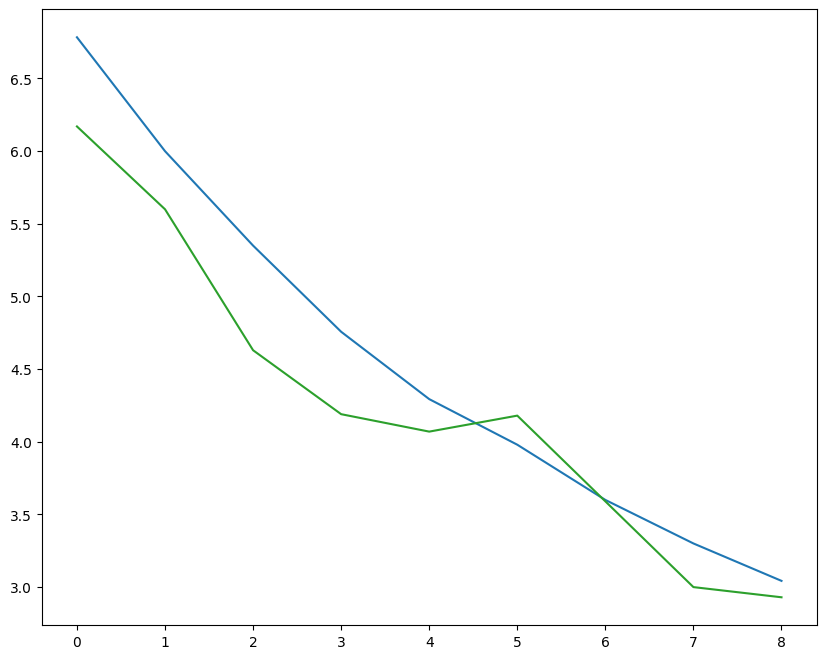

In [ ]:
import matplotlib.pyplot as plt

def drow(train_losses, val_losses):
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(train_losses)
    plt.plot(val_losses, 'tab:green')

    plt.show()

drow(train_losses, val_losses)

In [ ]:
model.eval()

def answer(x, **kwargs):
    inputs = tokenizer(x, return_tensors='pt').to(model.device)
    with torch.no_grad():
        hypotheses = model.generate(**inputs, **kwargs)
    return tokenizer.decode(hypotheses[0], skip_special_tokens=True)

In [ ]:
# Должно быть 'surprise'
print(answer(
    'emotion | Количеству подписчиков на его соцсети в свое время подивились даже сотрудники пресс-службы канадского космического агентства .'))

sadness


/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
# Должно быть 'sadness'
print(answer(
    'emotion | Но мне ужасно грустно , и плохо ('))

sadness


In [ ]:
# Хочется видеть 'joy'
print(answer(
    'emotion | Я рада.'))

sadness


In [ ]:
# Должно быть 'fear'
print(answer(
    'emotion | Когда Бердсли внезапно почувствовала, что с ее лицом происходит что-то странное, она вызвала скорую помощь, опасаясь инсульта.'))

sadness


In [ ]:
codes

{0: 'joy', 1: 'sadness', 2: 'surprise', 3: 'fear', 4: 'anger'}

In [ ]:
print(answer('translate ru-en | Каждый охотник желает знать, где сидит фазан.'))
# Each hunter wants to know, where he is.

The hunter would like to know where is the fagan.


In [ ]:
model.save_pretrained(MODEL_NAME)
tokenizer.save_pretrained(MODEL_NAME)

('/gd/MyDrive/models/rut5-base-partial/tokenizer_config.json',
 '/gd/MyDrive/models/rut5-base-partial/special_tokens_map.json',
 '/gd/MyDrive/models/rut5-base-partial/spiece.model',
 '/gd/MyDrive/models/rut5-base-partial/added_tokens.json',
 '/gd/MyDrive/models/rut5-base-partial/tokenizer.json')

In [ ]:
# !ls $MODEL_NAME